Trabalho Rodolfo Sato Junior e Akilles Yuri Nakabori


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Base de dados de Automoveis


### DESCRIÇÃO DOS ATRIBUTOS:


*   ```Fabricante``` --  Fabricante (str)
*   ```Combustível``` --  Combustível (gas; diesel)
*   ```Portas``` --  Quantidade de portas no veiculo
*   ```Estilo Chassis``` --  Estilo do Chassi (conversível; hatch; suv; sedan)
*   ```Tração``` --  Tração dos pneus (traseira; dianteira; 4x4)
*   ```Comprimento``` --  Comprimento do veiculo
*   ```Largura``` --  Largura do veiculo
*   ```Altura``` --  Altura do veiculo
*   ```Tipo de motor``` --  Tipo do motor (dohc; ohcv; ohc; ohcf; dohcv; rotor; l)
*   ```Número de cilindros``` --  Número de cilindros do veiculo
*   ```Tamanho do motor``` --  Tamanho do motor
*   ```Tipo de injeção``` --  Tipo de injeção (1bbl; 2bbl; 4bbl; idi; mfi; mpfi; spdi; spfi)
*   ```Potência (HP)``` --  Potencia do motor
*   ```Pico RPMs``` --  Picos de RPMs
*   ```Preço``` --  Preço do veiculo



In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
automoveis = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Bases/automoveis.xlsx")
automoveis

,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
0,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","13495,00"
1,alfa-romeo,gas,2.0,conversível,traseira,"168,80","64,10","48,80",dohc,4,"130,00",mpfi,"111,00","5000,00","16500,00"
2,alfa-romeo,gas,2.0,hatch,traseira,"171,20","65,50","52,40",ohcv,6,"152,00",mpfi,"154,00","5000,00","16500,00"
3,audi,gas,4.0,sedan,dianteira,"176,60","66,20","54,30",ohc,4,"109,00",mpfi,"102,00","5500,00","13950,00"
4,audi,gas,4.0,sedan,4x4,"176,60","66,40","54,30",ohc,5,"136,00",mpfi,"115,00","5500,00","17450,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,4.0,sedan,traseira,"188,80","68,90","55,50",ohcv,6,"173,00",mpfi,"134,00","5500,00","21485,00"
201,volvo,diesel,4.0,sedan,traseira,"188,80","68,90","55,50",ohc,6,"145,00",idi,"106,00","4800,00","22470,00"
202,volvo,gas,4.0,sedan,traseira,"188,80","68,90","55,50",ohc,4,"141,00",mpfi,"114,00","5400,00","22625,00"
203,NaN,gas,4.0,sedan,traseira,"176,80","64,80","54,30",ohc,6,"164,00",mpfi,"121,00","4250,00","21105,00"


In [162]:
automoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           203 non-null    object 
 1   Combustível          200 non-null    object 
 2   Portas               203 non-null    float64
 3   Estilo Chassis       205 non-null    object 
 4   Tração               205 non-null    object 
 5   Comprimento          205 non-null    object 
 6   Largura              205 non-null    object 
 7   Altura               205 non-null    object 
 8   Tipo de motor        205 non-null    object 
 9   Número de cilindros  205 non-null    object 
 10  Tamanho do motor     205 non-null    object 
 11  Tipo de injeção      205 non-null    object 
 12  Potência (HP)        205 non-null    object 
 13  Pico RPM             205 non-null    object 
 14  Preço                205 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [163]:
automoveis.shape # linhas, colunas

(205, 15)

In [164]:
automoveis.columns

Index(['Fabricante', 'Combustível', 'Portas', 'Estilo Chassis', 'Tração',
       'Comprimento', 'Largura', 'Altura', 'Tipo de motor',
       'Número de cilindros', 'Tamanho do motor', 'Tipo de injeção',
       'Potência (HP)', 'Pico RPM', 'Preço'],
      dtype='object')

Variáveis categóricas ou strings são lidas como `object`

### ESTATÍSTICA DESCRITIVA DOS DADOS

O comando describe exibe prioritariamente os campos numéricos. Deve-se isolar os campos categóricos para serem exibidos posteriormente.

In [165]:
# Exibe apenas os campos numméricos:

automoveis.describe()

,Portas
count,203.000000
mean,3.123153
std,0.994841
min,2.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,4.000000


In [166]:
# Para se ter uma visão dos atributos categóricos, os atributos não numéricos 
# são descartados. 

automoveis.select_dtypes(include='object').describe()

,Fabricante,Combustível,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Tamanho do motor,Tipo de injeção,Potência (HP),Pico RPM,Preço
count,203,200,205,205,205,205,205,205,205,205,205,205,205,205
unique,22,2,5,3,75,44,49,7,7,44,8,60,25,187
top,toyota,gas,sedan,dianteira,"157,30","63,80","50,80",ohc,4,"122,00",mpfi,"68,00","5500,00","13207,13"
freq,32,180,96,120,15,24,14,148,159,15,94,19,37,4


### REMOÇÃO DE ATRIBUTOS IRRELEVANTES

* ```Tamanho do motor``` é um dado irrelevante pelo fato de que poucas pessoas pesquisam o tamanho de um motor de um carro.

* ```Tipo de injeção``` é um dado irrelevante pelo fato de que poucas pessoas pesquisam a tipo de injeção um carro.

* ```Pico RPM``` é um dado irrelevante pelo fato de que poucas pessoas conhecem o pico de rpm de um carro.

In [167]:
del automoveis['Tamanho do motor']
del automoveis['Tipo de injeção']
del automoveis['Pico RPM']

# Verifique que o número de atributos (colunas) reduziu para 12.

automoveis.shape

(205, 12)

### VALORES OMISSOS OU INCONSISTENTES

Em atributos numéricos , as possibilidades são:

1. substituir por zeros;
2. substituir por um valor médio ou mediano;
3. estimar valores usando modelos estatísticos ou preditivos;
4. particionar a base em registros completos e registros incompletos.

Vamos analisar o atributo `Portas` e `Número de cilindros` para tratarmos os valores omissos.

In [168]:
automoveis['Portas'] = automoveis['Portas'].map({2:2,
                             4:4,
                             "":0,
                             })

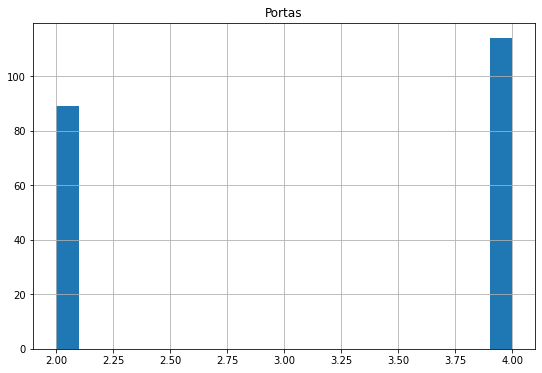

In [169]:
automoveis.hist(column='Portas',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20);        # Numero de colunas/bins do histograma

In [170]:
automoveis['Número de cilindros'] = automoveis['Número de cilindros'].map({'doze': 12,
                             'oito':8,
                             2:2,
                             3:3,
                             4:4,
                             5:5,
                             6:6})

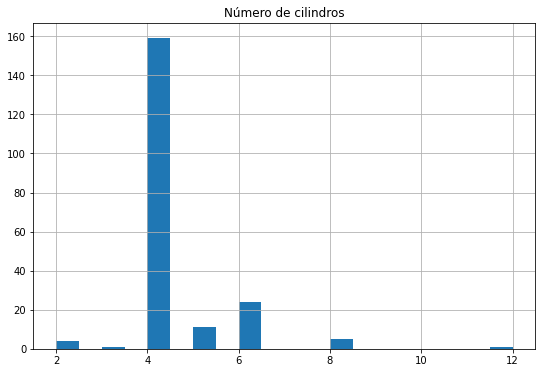

In [171]:
automoveis.hist(column='Número de cilindros',    # Coluna a ser plotada
                   figsize=(9,6),   # Tamanho do gráfico
                   bins=20);        # Numero de colunas/bins do histograma

### DETECTANDO OUTLIERS

Outliers são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de outliers, com valores máximos e mínimo muito distantes; o valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição dos dados.

In [172]:
display(automoveis.dtypes)

Fabricante              object
Combustível             object
Portas                 float64
Estilo Chassis          object
Tração                  object
Comprimento             object
Largura                 object
Altura                  object
Tipo de motor           object
Número de cilindros      int64
Potência (HP)           object
Preço                   object
dtype: object

In [173]:
automoveis["Preço"] = automoveis["Preço"].str.replace(',','.').astype(np.float64)

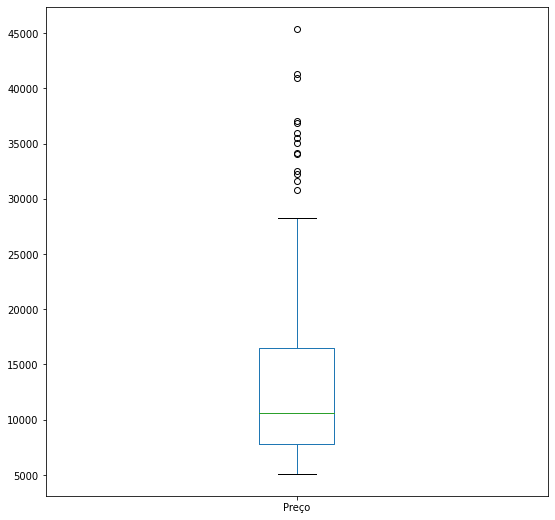

In [175]:
automoveis2["Preço"].plot(kind="box", figsize=(9,9));

In [ ]:
# tukey test

In [180]:
print("Registros com maior valor:")
automoveis[automoveis["Preço"] == max(automoveis["Preço"])]

Registros com maior valor:


,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Potência (HP),Preço
72,mercedes-benz,gas,2.0,hardtop,traseira,"199,20","72,00","55,40",ohcv,8,"184,00",45400.0


In [181]:
print("Registros com menor valor:")
automoveis[automoveis["Preço"] == min(automoveis["Preço"])]

Registros com menor valor:


,Fabricante,Combustível,Portas,Estilo Chassis,Tração,Comprimento,Largura,Altura,Tipo de motor,Número de cilindros,Potência (HP),Preço
136,subaru,gas,2.0,hatch,dianteira,"156,90","63,40","53,70",ohcf,4,"69,00",5118.0
